<a href="https://colab.research.google.com/github/keiiigo/UPA-2023/blob/Trabajo-Final-Big-Data/CFinal_Leonardo_Mitsui_BigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar módulos
import requests
import csv
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

# **1. Web Scraping:** Your Name - Makoto Shinkai

Elija un sitio web que contenga comentarios de películas.

Utilice bibliotecas como BeautifulSoup o Selenium para extraer los comentarios de las películas. Guarde los datos en un archivo CSV o DataFrame.

In [ ]:
# Primero se indica la cantidad de paginas que deben ser escaneas "EJ: IMDB Spiderman Pagina 1,2,3,4,5,6,7,8,9,10"
no_pages = 10

#El codigo define la funcion de get_data
#El porposito de esta funcion es sacar la informacion con los diferentes parametros EJ: Sacar de Mozilla
def get_data(pageNo):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0",
        "Accept-Encoding": "gzip, deflate",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
        "DNT": "1",
        "Connection": "close",
        "Upgrade-Insecure-Requests": "1"
    }
#Definimos el url que queremos scrapear
    url = 'https://myanimelist.net/anime/32281/Kimi_no_Na_wa/reviews?sort=suggested&filter_check=3&filter_hide=&preliminary=on&spoiler=on&p=' + str(pageNo)
    r = requests.get(url, headers=headers)
    content = r.content
    soup = BeautifulSoup(content, 'html.parser')

#Definimos que partes del html queremos extraer con la funcion soup
    comentario_html = soup.find_all('div', class_="text")

    #Buscamos solamente el texto
    comentarios = [comentario.get_text(strip=True) for comentario in comentario_html]

    fecha_html = soup.find_all('div', class_="update_at")

    #Buscamos solamente la fecha basado en %b, %d, y %y
    fechas = [datetime.strptime(fecha.get_text(strip=True), '%b %d, %Y') for fecha in fecha_html]

    usuario_html = soup.find_all('div', class_="username")

    #Buscamos solamente el texto
    usuarios = [usuario.get_text(strip=True) for usuario in usuario_html]

#Metemos en un dataframe para testear si extrajo los datos correctamente
    yourname = {'Usuario': usuarios, 'Fecha': fechas, 'Comentario': comentarios}

    df = pd.DataFrame(yourname)

    return df

#Creamos un ciclo for para escrapear las proximas paginas en vez de solamente la primera pagina
data_frames = []
for pageNo in range(1, no_pages + 1):
    df = get_data(pageNo)
    data_frames.append(df)

#Hacemos concat los dos dataframes en uno solo
end_data = pd.concat(data_frames, ignore_index=True)

print(end_data)

            Usuario      Fecha  \
0               Jex 2016-09-09   
1          LIQfilms 2016-09-10   
2      takutomaruki 2016-09-13   
3         Shrabster 2016-09-28   
4       Chanclasman 2016-09-13   
..              ...        ...   
182  True_Scientist 2019-01-29   
183        DeepDoge 2018-01-14   
184           saggz 2018-03-18   
185   spongebob2012 2020-08-04   
186      Sasayaklin 2017-06-30   

                                            Comentario  
0    Makoto Shinkai's latest work goes even further...  
1    THIS REVIEW CONTAINS SPOILERSAs of writing thi...  
2    Fair warning: this review contains MAJOR spoil...  
3    Makoto Shinkai never fails to frustrate me. Hi...  
4    THIS REVIEW CONTAINS SPOILERSI had the necessi...  
..                                                 ...  
182  Everyone says that this is a great anime. Stro...  
183  (I really tried to explain how that "thing" fe...  
184  I don't understand how this movie got so high ...  
185  It's hard to wri

In [ ]:
#Crear un csv
end_data.to_csv('scraped_data.csv', index=False)

## **Análisis de Sentimiento:**

Utilice una biblioteca de análisis de sentimiento, como NLTK o TextBlob, para asignar un puntaje de sentimiento a cada comentario.

Clasifique los comentarios en positivos, negativos o neutros según el puntaje de sentimiento.

In [ ]:
#El codigo define la funcion clean
#La funcion clean es usada para limpiar el texto con el re.sub y reemplazarlos por 'nada'
def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', text)
    text = re.sub('@',' ',text)
    return text
#Definimos en que columna queremos limpiar los textos y creamos una nueva columna con los datos limpios
end_data['Comments'] = end_data['Comentario'].apply(lambda x: clean(str(x)) if isinstance(x, str) else '')

end_data

,Usuario,Fecha,Comentario,Comments
0,Jex,2016-09-09,Makoto Shinkai's latest work goes even further...,Makoto Shinkai s latest work goes even further...
1,LIQfilms,2016-09-10,THIS REVIEW CONTAINS SPOILERSAs of writing thi...,THIS REVIEW CONTAINS SPOILERSAs of writing thi...
2,takutomaruki,2016-09-13,Fair warning: this review contains MAJOR spoil...,Fair warning this review contains MAJOR spoile...
3,Shrabster,2016-09-28,Makoto Shinkai never fails to frustrate me. Hi...,Makoto Shinkai never fails to frustrate me His...
4,Chanclasman,2016-09-13,THIS REVIEW CONTAINS SPOILERSI had the necessi...,THIS REVIEW CONTAINS SPOILERSI had the necessi...
...,...,...,...,...
182,True_Scientist,2019-01-29,Everyone says that this is a great anime. Stro...,Everyone says that this is a great anime Stron...
183,DeepDoge,2018-01-14,"(I really tried to explain how that ""thing"" fe...",I really tried to explain how that thing feel...
184,saggz,2018-03-18,I don't understand how this movie got so high ...,I don t understand how this movie got so high ...
185,spongebob2012,2020-08-04,It's hard to write much about this movie becau...,It s hard to write much about this movie becau...


In [ ]:
#Visualizacion de las columnas
end_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Usuario     187 non-null    object        
 1   Fecha       187 non-null    datetime64[ns]
 2   Comentario  187 non-null    object        
 3   Comments    187 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 6.0+ KB


In [ ]:
#Nuevamente miramos las columnas para verificar si existen errores
end_data.columns

Index(['Usuario', 'Fecha', 'Comentario', 'Comments'], dtype='object')

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
import nltk
nltk.download('averaged_perceptron_tagger')

#Creamos un diccionario con el Wordnet para definir las palabras
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

#Definimos la funcion token_stop_pos para hacer tokenize
#Tokeniza el texto de entrda en palabras y luego las etiqueta
#newlist es inicializada para almacenar las palabrabras tokenizadas y etiquetadas
#Si es que la palabra, no es una palabra vacia agrega una tupla que contiene la palabra y su correspondiente constante en base a Wordnet
#Ultimamente agrega una lista nueva a las palabras que estan tokenizadas
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist
#Traemos explicitamente 500 comentarios del head para no explotar a la maquina
end_data = end_data.head(500)

end_data['POS tagged'] = end_data['Comments'].apply(token_stop_pos)
end_data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
<ipython-input-7-e77c460b210c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  end_data['POS tagged'] = end_data['Comments'].apply(token_stop_pos)


,Usuario,Fecha,Comentario,Comments,POS tagged
0,Jex,2016-09-09,Makoto Shinkai's latest work goes even further...,Makoto Shinkai s latest work goes even further...,"[(Makoto, n), (Shinkai, n), (latest, a), (work..."
1,LIQfilms,2016-09-10,THIS REVIEW CONTAINS SPOILERSAs of writing thi...,THIS REVIEW CONTAINS SPOILERSAs of writing thi...,"[(REVIEW, n), (CONTAINS, n), (SPOILERSAs, n), ..."
2,takutomaruki,2016-09-13,Fair warning: this review contains MAJOR spoil...,Fair warning this review contains MAJOR spoile...,"[(Fair, n), (warning, v), (review, n), (contai..."
3,Shrabster,2016-09-28,Makoto Shinkai never fails to frustrate me. Hi...,Makoto Shinkai never fails to frustrate me His...,"[(Makoto, n), (Shinkai, n), (never, r), (fails..."
4,Chanclasman,2016-09-13,THIS REVIEW CONTAINS SPOILERSI had the necessi...,THIS REVIEW CONTAINS SPOILERSI had the necessi...,"[(REVIEW, n), (CONTAINS, n), (SPOILERSI, n), (..."


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

#Usamos la funcion de lemmatize para sacar la palabra raiz de las palabras EJ: Corremos = Correr
#Usamos la columna de POS tagged para clasificar y luego ser limpiadas en base a el Lemma
#Creamos una nueva columa con el lemmatize ya aplicado
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

#Creamos una nueva columna con el lemmatize ya aplicado
end_data['Lemma'] = end_data['POS tagged'].apply(lemmatize)
end_data.head()

<ipython-input-8-676d5df4ff4a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  end_data['Lemma'] = end_data['POS tagged'].apply(lemmatize)


,Usuario,Fecha,Comentario,Comments,POS tagged,Lemma
0,Jex,2016-09-09,Makoto Shinkai's latest work goes even further...,Makoto Shinkai s latest work goes even further...,"[(Makoto, n), (Shinkai, n), (latest, a), (work...",Makoto Shinkai late work go even support the...
1,LIQfilms,2016-09-10,THIS REVIEW CONTAINS SPOILERSAs of writing thi...,THIS REVIEW CONTAINS SPOILERSAs of writing thi...,"[(REVIEW, n), (CONTAINS, n), (SPOILERSAs, n), ...",REVIEW CONTAINS SPOILERSAs write review film...
2,takutomaruki,2016-09-13,Fair warning: this review contains MAJOR spoil...,Fair warning this review contains MAJOR spoile...,"[(Fair, n), (warning, v), (review, n), (contai...",Fair warn review contain MAJOR spoiler basic...
3,Shrabster,2016-09-28,Makoto Shinkai never fails to frustrate me. Hi...,Makoto Shinkai never fails to frustrate me His...,"[(Makoto, n), (Shinkai, n), (never, r), (fails...",Makoto Shinkai never fail frustrate work tre...
4,Chanclasman,2016-09-13,THIS REVIEW CONTAINS SPOILERSI had the necessi...,THIS REVIEW CONTAINS SPOILERSI had the necessi...,"[(REVIEW, n), (CONTAINS, n), (SPOILERSI, n), (...",REVIEW CONTAINS SPOILERSI necessity write th...


In [ ]:
#Visualizamos las tres columas, una, que fue lematizada y limpiada
end_data[['Comentario', 'Comments','Lemma']]

,Comentario,Comments,Lemma
0,Makoto Shinkai's latest work goes even further...,Makoto Shinkai s latest work goes even further...,Makoto Shinkai late work go even support the...
1,THIS REVIEW CONTAINS SPOILERSAs of writing thi...,THIS REVIEW CONTAINS SPOILERSAs of writing thi...,REVIEW CONTAINS SPOILERSAs write review film...
2,Fair warning: this review contains MAJOR spoil...,Fair warning this review contains MAJOR spoile...,Fair warn review contain MAJOR spoiler basic...
3,Makoto Shinkai never fails to frustrate me. Hi...,Makoto Shinkai never fails to frustrate me His...,Makoto Shinkai never fail frustrate work tre...
4,THIS REVIEW CONTAINS SPOILERSI had the necessi...,THIS REVIEW CONTAINS SPOILERSI had the necessi...,REVIEW CONTAINS SPOILERSI necessity write th...
...,...,...,...
182,Everyone says that this is a great anime. Stro...,Everyone says that this is a great anime Stron...,Everyone say great anime Strongly disagree s...
183,"(I really tried to explain how that ""thing"" fe...",I really tried to explain how that thing feel...,really try explain thing feel like really li...
184,I don't understand how this movie got so high ...,I don t understand how this movie got so high ...,understand movie get high rating watch look ...
185,It's hard to write much about this movie becau...,It s hard to write much about this movie becau...,hard write much movie forgettable MC typical...


In [ ]:
from textblob import TextBlob

#Esta funcion es usada para la subjetividad de los comentarios en base a 1 - 0
def Subjectivity(review):
    return TextBlob(review).sentiment.subjectivity

#Esta funcion es usada para definir la polaridad de los comentarios en base a -1 = negativo, 0 = neutral, 1 = positivo
def Polarity(review):
    return TextBlob(review).sentiment.polarity

# Parametros definidos
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
#Creamos un nuevo dataframe con las siguientes columnas
Mal_data = pd.DataFrame(end_data[['Comments', 'Lemma','Fecha']])

In [ ]:
#Agregamos mas columnas de polaridad en base a el Lemma y el de analisis en base a la polaridad
Mal_data['Polarity'] = Mal_data['Lemma'].apply(Polarity)
Mal_data['Analysis'] = Mal_data['Polarity'].apply(analysis)
Mal_data.head()

,Comments,Lemma,Fecha,Polarity,Analysis
0,Makoto Shinkai s latest work goes even further...,Makoto Shinkai late work go even support the...,2016-09-09,0.141065,Positive
1,THIS REVIEW CONTAINS SPOILERSAs of writing thi...,REVIEW CONTAINS SPOILERSAs write review film...,2016-09-10,0.130247,Positive
2,Fair warning this review contains MAJOR spoile...,Fair warn review contain MAJOR spoiler basic...,2016-09-13,0.072880,Positive
3,Makoto Shinkai never fails to frustrate me His...,Makoto Shinkai never fail frustrate work tre...,2016-09-28,0.064360,Positive
4,THIS REVIEW CONTAINS SPOILERSI had the necessi...,REVIEW CONTAINS SPOILERSI necessity write th...,2016-09-13,0.132786,Positive


In [ ]:
#Linea usada para el conteo de la columna de "Analysis"
tb_counts =Mal_data.Analysis.value_counts()
tb_counts

Positive    159
Negative     28
Name: Analysis, dtype: int64

## **Visualización de Datos:**

Cree gráficos para visualizar los resultados del análisis de sentimiento. Puede utilizar bibliotecas como Matplotlib o Seaborn.
Genere un gráfico de barras o pastel para mostrar la distribución de los comentarios por categoría de sentimiento (positivo, negativo, neutro).
Cree un gráfico de líneas para mostrar la evolución del sentimiento a lo largo del tiempo si los comentarios tienen información temporal.

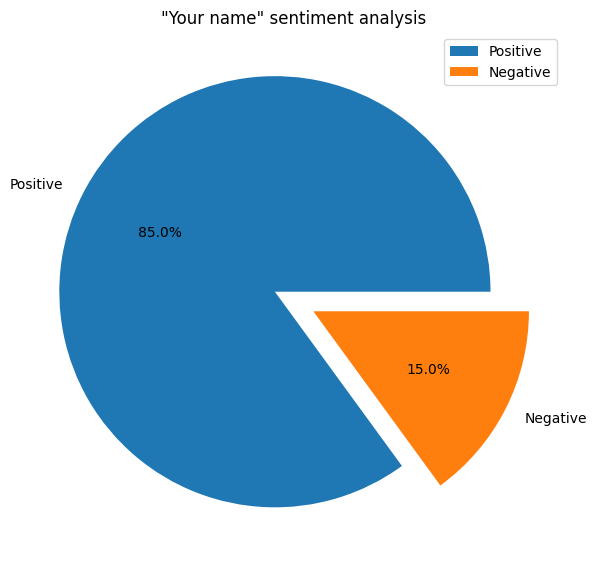

In [ ]:
import matplotlib.pyplot as plt

#Usada para contar las diferentes variables que hay
tb_counts = Mal_data['Analysis'].value_counts()

#Usamos explode para separar mas los resultados del grafico
explode = [0.1] * len(tb_counts)

#Creamos nuestro grafico en base a estos parametros
plt.figure(figsize=(10, 7))
plt.title('"Your name" sentiment analysis')
plt.pie(tb_counts.values, labels=tb_counts.index, explode=explode, autopct='%1.1f%%', shadow=False)
plt.legend(labels=['Positive', 'Negative', 'Neutral'], loc='upper right')

plt.show()

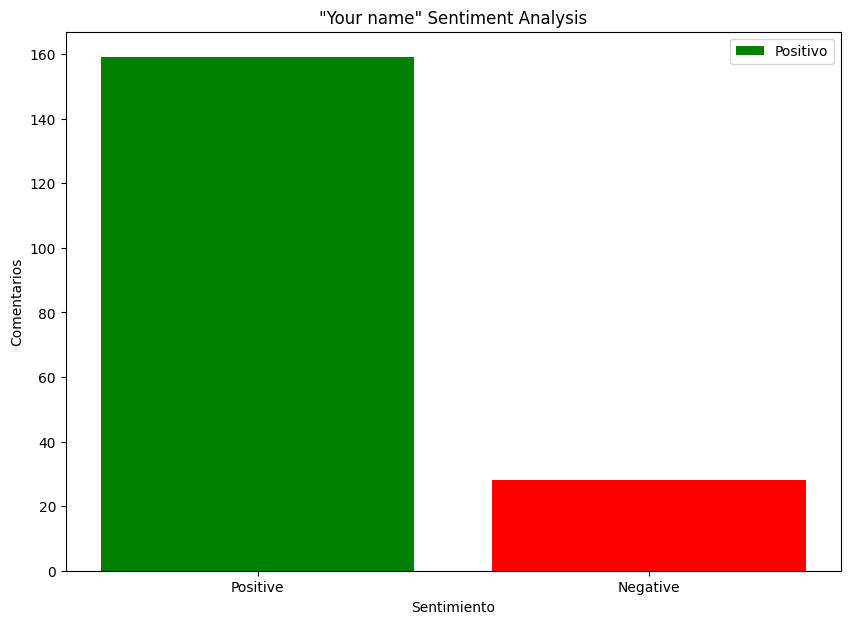

In [ ]:
tb_counts = Mal_data['Analysis'].value_counts()

#Ponemos colores a los graficos
colors = ['green', 'red', 'blue']

#Creacion de los graficos
plt.figure(figsize=(10, 7))
plt.bar(tb_counts.index, tb_counts.values, color=colors)
plt.legend(labels=['Positivo', 'Negative', 'Neutral'], loc='upper right')

#Ponemos nombres a los valores de nuestro grafico
plt.xlabel('Sentimiento')
plt.ylabel('Comentarios')
plt.title('"Your name" Sentiment Analysis')

plt.show()

<ipython-input-75-d9a266ecf4ff>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values('Fecha', inplace=True)


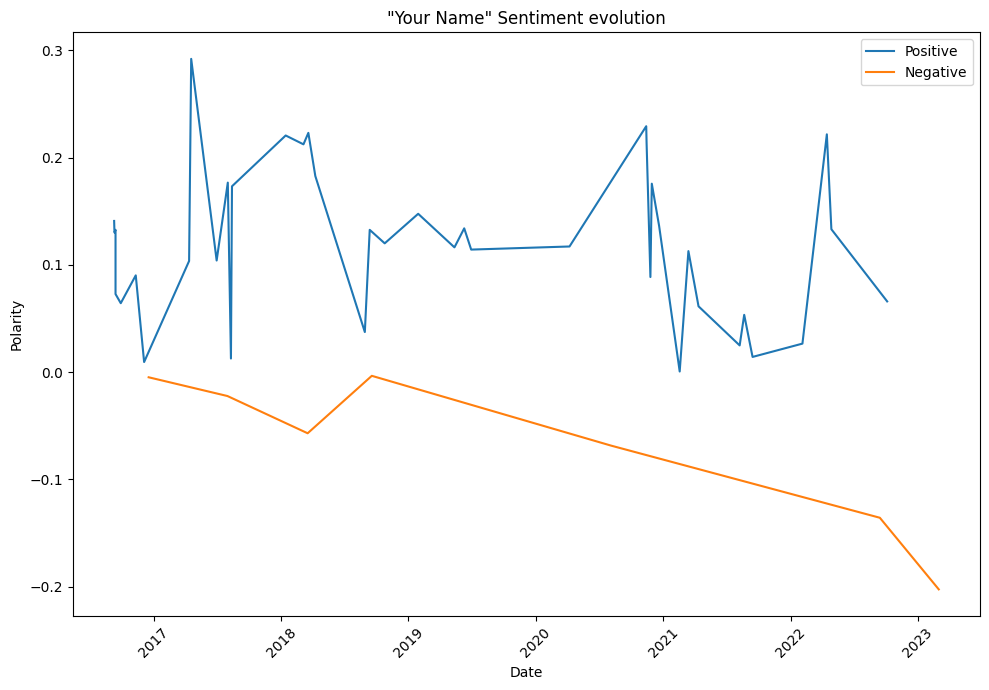

In [ ]:
#Fijamos en base a que datos queremos que nuestro grafico este distribuido
Mal_data.sort_values('Fecha', inplace=True)

#Asignamos el tamano de nuestro grafico
fig, ax = plt.subplots(figsize=(10, 7))

sentiments = Mal_data['Analysis'].unique()

#El ciclo es usado a traves de cada categoria para crear un grafico para las categorias
#Positivo neutral negativo, en este caso solamente hay dos
for sentiment in sentiments:

    data = Mal_data[Mal_data['Analysis'] == sentiment]

    data.sort_values('Fecha', inplace=True)

    polarities = data['Polarity']
    dates = data['Fecha']
    counts = data.shape[0]

    ax.plot(dates, polarities, label=sentiment)

#Ponemos los nombres a los valores de nuestro grafico x,y,titulo
ax.set_xlabel('Date')
ax.set_ylabel('Polarity')
ax.set_title('"Your Name" Sentiment evolution')

plt.xticks(rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

# **2. Web Scraping:** Weathering With You - Makoto Shinkai

Elija un sitio web que contenga comentarios de películas.

Utilice bibliotecas como BeautifulSoup o Selenium para extraer los comentarios de las películas. Guarde los datos en un archivo CSV o DataFrame.

In [ ]:
no_pages = 10

def get_data(pageNo):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0",
        "Accept-Encoding": "gzip, deflate",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
        "DNT": "1",
        "Connection": "close",
        "Upgrade-Insecure-Requests": "1"
    }

    url = 'https://myanimelist.net/anime/38826/Tenki_no_Ko/reviews?sort=suggested&filter_check=3&filter_hide=&preliminary=on&spoiler=off&p=' + str(pageNo)
    r = requests.get(url, headers=headers)
    content = r.content
    soup = BeautifulSoup(content, 'html.parser')

    comentario_html = soup.find_all('div', class_="text")
    comentarios = [comentario.get_text(strip=True) for comentario in comentario_html]

    fecha_html = soup.find_all('div', class_="update_at")
    fechas = [datetime.strptime(fecha.get_text(strip=True), '%b %d, %Y') for fecha in fecha_html]

    usuario_html = soup.find_all('div', class_="username")
    usuarios = [usuario.get_text(strip=True) for usuario in usuario_html]

    weatheringwithyou = {'Usuario': usuarios, 'Fecha': fechas, 'Comentario': comentarios}

    df = pd.DataFrame(weatheringwithyou)

    return df

data_frames = []
for pageNo in range(1, no_pages + 1):
    df = get_data(pageNo)
    data_frames.append(df)

end_data3 = pd.concat(data_frames, ignore_index=True)

print(end_data3)

             Usuario      Fecha  \
0             Clueby 2019-09-11   
1      roastbeefbeef 2020-01-20   
2      CodeBlazeFate 2020-06-20   
3               MLFM 2019-10-18   
4     LibrarianJukka 2023-06-08   
..               ...        ...   
179  kirazerorequiem 2021-02-17   
180        Taris_Max 2020-03-18   
181      sayako-sama 2021-08-10   
182            pLiss 2020-12-12   
183       Ota-kun-63 2020-01-14   

                                            Comentario  
0    Despite the overwhelming reviews saying that t...  
1    This is Shinkai’s worst film yet. He had a mix...  
2    [Spoilers ahead]The monumental success of Mako...  
3    Tenki no Ko or Weathering with You. A movie I ...  
4    Shinkai's worst movie. I haven't seen them all...  
..                                                 ...  
179  Overall it was just a bland and ordinary movie...  
180  Everyone say that Tenki no Ko get the good sco...  
181  Just watched this for the animations, but I ca...  
182  Weat

## **Análisis de Sentimiento:**

Utilice una biblioteca de análisis de sentimiento, como NLTK o TextBlob, para asignar un puntaje de sentimiento a cada comentario.

Clasifique los comentarios en positivos, negativos o neutros según el puntaje de sentimiento.

In [ ]:
def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', text)
    text = re.sub('@',' ',text)
    return text

end_data3['Comments'] = end_data3['Comentario'].apply(lambda x: clean(str(x)) if isinstance(x, str) else '')

end_data3

,Usuario,Fecha,Comentario,Comments
0,Clueby,2019-09-11,Despite the overwhelming reviews saying that t...,Despite the overwhelming reviews saying that t...
1,roastbeefbeef,2020-01-20,This is Shinkai’s worst film yet. He had a mix...,This is Shinkai s worst film yet He had a mixe...
2,CodeBlazeFate,2020-06-20,[Spoilers ahead]The monumental success of Mako...,Spoilers ahead The monumental success of Mako...
3,MLFM,2019-10-18,Tenki no Ko or Weathering with You. A movie I ...,Tenki no Ko or Weathering with You A movie I w...
4,LibrarianJukka,2023-06-08,Shinkai's worst movie. I haven't seen them all...,Shinkai s worst movie I haven t seen them all ...
...,...,...,...,...
179,kirazerorequiem,2021-02-17,Overall it was just a bland and ordinary movie...,Overall it was just a bland and ordinary movie...
180,Taris_Max,2020-03-18,Everyone say that Tenki no Ko get the good sco...,Everyone say that Tenki no Ko get the good sco...
181,sayako-sama,2021-08-10,"Just watched this for the animations, but I ca...",Just watched this for the animations but I can...
182,pLiss,2020-12-12,Weathering With You's strong points come from ...,Weathering With You s strong points come from ...


In [ ]:
end_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Usuario     184 non-null    object        
 1   Fecha       184 non-null    datetime64[ns]
 2   Comentario  184 non-null    object        
 3   Comments    184 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 5.9+ KB


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
import nltk
nltk.download('averaged_perceptron_tagger')

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

end_data3 = end_data3.head(500)

end_data3['POS tagged'] = end_data3['Comments'].apply(token_stop_pos)
end_data3.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
<ipython-input-38-c5154f52835f>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  end_data3['POS tagged'] = end_data3['Comments'].apply(token_stop_pos)


,Usuario,Fecha,Comentario,Comments,POS tagged
0,Clueby,2019-09-11,Despite the overwhelming reviews saying that t...,Despite the overwhelming reviews saying that t...,"[(Despite, None), (overwhelming, a), (reviews,..."
1,roastbeefbeef,2020-01-20,This is Shinkai’s worst film yet. He had a mix...,This is Shinkai s worst film yet He had a mixe...,"[(Shinkai, n), (worst, a), (film, n), (yet, r)..."
2,CodeBlazeFate,2020-06-20,[Spoilers ahead]The monumental success of Mako...,Spoilers ahead The monumental success of Mako...,"[(Spoilers, n), (ahead, r), (monumental, a), (..."
3,MLFM,2019-10-18,Tenki no Ko or Weathering with You. A movie I ...,Tenki no Ko or Weathering with You A movie I w...,"[(Tenki, n), (Ko, n), (Weathering, v), (movie,..."
4,LibrarianJukka,2023-06-08,Shinkai's worst movie. I haven't seen them all...,Shinkai s worst movie I haven t seen them all ...,"[(Shinkai, n), (worst, a), (movie, n), (seen, ..."


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

end_data3['Lemma'] = end_data3['POS tagged'].apply(lemmatize)
end_data3.head()

<ipython-input-39-3bc3f103ae55>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  end_data3['Lemma'] = end_data3['POS tagged'].apply(lemmatize)


,Usuario,Fecha,Comentario,Comments,POS tagged,Lemma
0,Clueby,2019-09-11,Despite the overwhelming reviews saying that t...,Despite the overwhelming reviews saying that t...,"[(Despite, None), (overwhelming, a), (reviews,...",Despite overwhelming review say masterpiece ...
1,roastbeefbeef,2020-01-20,This is Shinkai’s worst film yet. He had a mix...,This is Shinkai s worst film yet He had a mixe...,"[(Shinkai, n), (worst, a), (film, n), (yet, r)...",Shinkai bad film yet mixed record past quali...
2,CodeBlazeFate,2020-06-20,[Spoilers ahead]The monumental success of Mako...,Spoilers ahead The monumental success of Mako...,"[(Spoilers, n), (ahead, r), (monumental, a), (...",Spoilers ahead monumental success Makoto Shi...
3,MLFM,2019-10-18,Tenki no Ko or Weathering with You. A movie I ...,Tenki no Ko or Weathering with You A movie I w...,"[(Tenki, n), (Ko, n), (Weathering, v), (movie,...",Tenki Ko Weathering movie overhyped much typ...
4,LibrarianJukka,2023-06-08,Shinkai's worst movie. I haven't seen them all...,Shinkai s worst movie I haven t seen them all ...,"[(Shinkai, n), (worst, a), (movie, n), (seen, ...",Shinkai bad movie see call anyway single asp...


In [ ]:
end_data3[['Comentario', 'Comments','Lemma']]

,Comentario,Comments,Lemma
0,Despite the overwhelming reviews saying that t...,Despite the overwhelming reviews saying that t...,Despite overwhelming review say masterpiece ...
1,This is Shinkai’s worst film yet. He had a mix...,This is Shinkai s worst film yet He had a mixe...,Shinkai bad film yet mixed record past quali...
2,[Spoilers ahead]The monumental success of Mako...,Spoilers ahead The monumental success of Mako...,Spoilers ahead monumental success Makoto Shi...
3,Tenki no Ko or Weathering with You. A movie I ...,Tenki no Ko or Weathering with You A movie I w...,Tenki Ko Weathering movie overhyped much typ...
4,Shinkai's worst movie. I haven't seen them all...,Shinkai s worst movie I haven t seen them all ...,Shinkai bad movie see call anyway single asp...
...,...,...,...
179,Overall it was just a bland and ordinary movie...,Overall it was just a bland and ordinary movie...,Overall bland ordinary movie plot felt non e...
180,Everyone say that Tenki no Ko get the good sco...,Everyone say that Tenki no Ko get the good sco...,Everyone say Tenki Ko get good score recipe ...
181,"Just watched this for the animations, but I ca...",Just watched this for the animations but I can...,watch animation tell bit story Animations gr...
182,Weathering With You's strong points come from ...,Weathering With You s strong points come from ...,Weathering strong point come amazing animati...


In [ ]:
from textblob import TextBlob

def Subjectivity(review):
    return TextBlob(review).sentiment.subjectivity

def Polarity(review):
    return TextBlob(review).sentiment.polarity

def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
Mal_data3 = pd.DataFrame(end_data3[['Comments', 'Lemma','Fecha']])

In [ ]:
Mal_data3['Polarity'] = Mal_data3['Lemma'].apply(Polarity)
Mal_data3['Analysis'] = Mal_data3['Polarity'].apply(analysis)
Mal_data3.head()

,Comments,Lemma,Fecha,Polarity,Analysis
0,Despite the overwhelming reviews saying that t...,Despite overwhelming review say masterpiece ...,2019-09-11,0.129361,Positive
1,This is Shinkai s worst film yet He had a mixe...,Shinkai bad film yet mixed record past quali...,2020-01-20,0.010168,Positive
2,Spoilers ahead The monumental success of Mako...,Spoilers ahead monumental success Makoto Shi...,2020-06-20,0.023076,Positive
3,Tenki no Ko or Weathering with You A movie I w...,Tenki Ko Weathering movie overhyped much typ...,2019-10-18,-0.062719,Negative
4,Shinkai s worst movie I haven t seen them all ...,Shinkai bad movie see call anyway single asp...,2023-06-08,-0.031275,Negative


In [ ]:
tb_counts =Mal_data.Analysis.value_counts()
tb_counts

Positive    159
Negative     28
Name: Analysis, dtype: int64

## **Visualización de Datos:**

Cree gráficos para visualizar los resultados del análisis de sentimiento. Puede utilizar bibliotecas como Matplotlib o Seaborn.
Genere un gráfico de barras o pastel para mostrar la distribución de los comentarios por categoría de sentimiento (positivo, negativo, neutro).
Cree un gráfico de líneas para mostrar la evolución del sentimiento a lo largo del tiempo si los comentarios tienen información temporal.

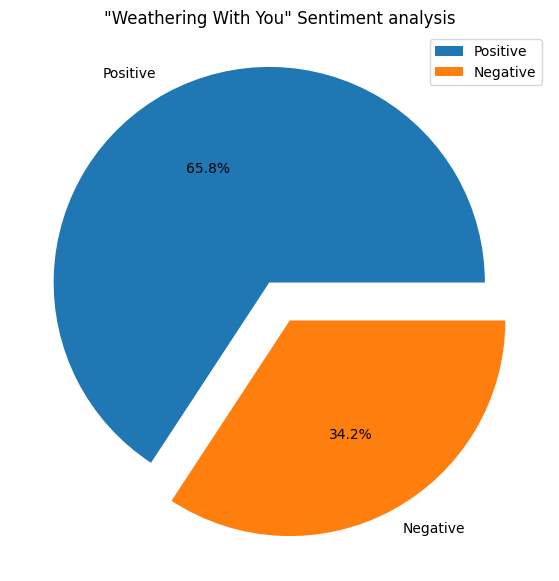

In [ ]:
import matplotlib.pyplot as plt

tb_counts = Mal_data3['Analysis'].value_counts()

explode = [0.1] * len(tb_counts)

plt.figure(figsize=(10, 7))
plt.title('"Weathering With You" Sentiment analysis')
plt.pie(tb_counts.values, labels=tb_counts.index, explode=explode, autopct='%1.1f%%', shadow=False)
plt.legend(labels=['Positive', 'Negative', 'Neutral'], loc='upper right')

plt.show()

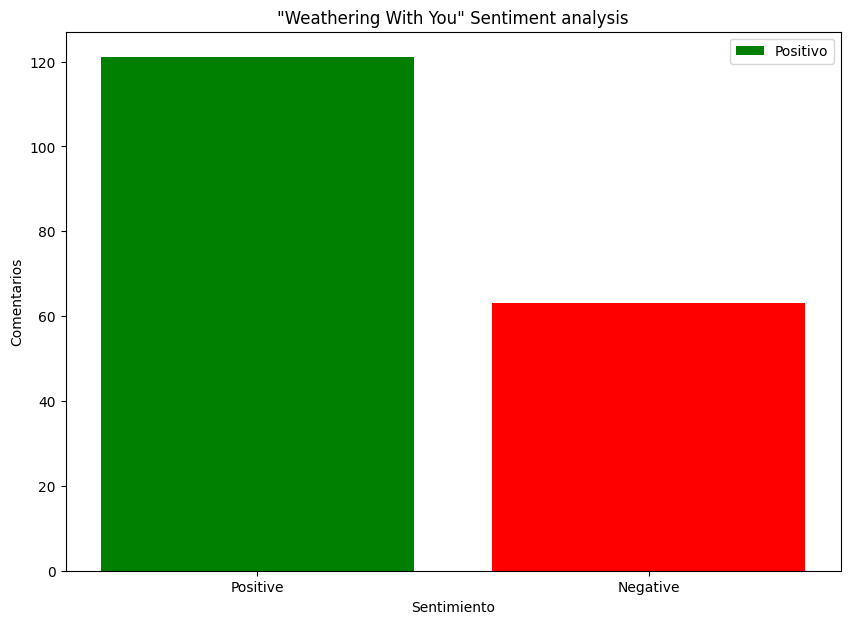

In [ ]:
tb_counts = Mal_data3['Analysis'].value_counts()

colors = ['green', 'red', 'blue']

plt.figure(figsize=(10, 7))
plt.bar(tb_counts.index, tb_counts.values, color=colors)

plt.legend(labels=['Positivo', 'Negative', 'Neutral'], loc='upper right')

plt.xlabel('Sentimiento')
plt.ylabel('Comentarios')
plt.title('"Weathering With You" Sentiment analysis')

plt.show()

<ipython-input-78-f6b5d5a70c16>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values('Fecha', inplace=True)


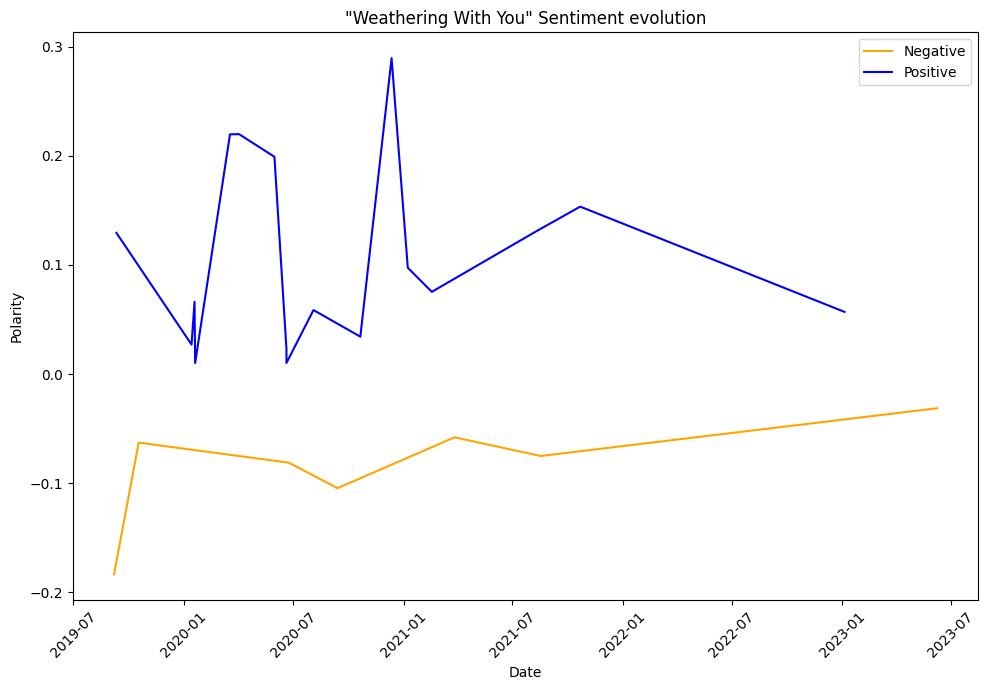

In [ ]:
Mal_data3.sort_values('Fecha', inplace=True)

fig, ax = plt.subplots(figsize=(10, 7))

sentiments = Mal_data3['Analysis'].unique()

for sentiment in sentiments:

    data = Mal_data3[Mal_data3['Analysis'] == sentiment]

    data.sort_values('Fecha', inplace=True)

    polarities = data['Polarity']
    dates = data['Fecha']
    counts = data.shape[0]

    color = 'blue' if sentiment == 'Positive' else 'orange'

    ax.plot(dates, polarities, label=sentiment, color=color)

ax.set_xlabel('Date')
ax.set_ylabel('Polarity')
ax.set_title('"Weathering With You" Sentiment evolution')

plt.xticks(rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

# **3. Web Scraping:** A Silent Voice - Shinichi Nakamura

Elija un sitio web que contenga comentarios de películas.

Utilice bibliotecas como BeautifulSoup o Selenium para extraer los comentarios de las películas. Guarde los datos en un archivo CSV o DataFrame.

In [ ]:
no_pages = 10

def get_data(pageNo):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0",
        "Accept-Encoding": "gzip, deflate",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
        "DNT": "1",
        "Connection": "close",
        "Upgrade-Insecure-Requests": "1"
    }

    url = 'https://myanimelist.net/anime/28851/Koe_no_Katachi/reviews?sort=suggested&filter_check=3&filter_hide=&preliminary=on&spoiler=on&p=' + str(pageNo)
    r = requests.get(url, headers=headers)
    content = r.content
    soup = BeautifulSoup(content, 'html.parser')

    comentario_html = soup.find_all('div', class_="text")
    comentarios = [comentario.get_text(strip=True) for comentario in comentario_html]

    fecha_html = soup.find_all('div', class_="update_at")
    fechas = [datetime.strptime(fecha.get_text(strip=True), '%b %d, %Y') for fecha in fecha_html]

    usuario_html = soup.find_all('div', class_="username")
    usuarios = [usuario.get_text(strip=True) for usuario in usuario_html]

    silentvoice = {'Usuario': usuarios, 'Fecha': fechas, 'Comentario': comentarios}

    df = pd.DataFrame(silentvoice)

    return df

data_frames = []
for pageNo in range(1, no_pages + 1):
    df = get_data(pageNo)
    data_frames.append(df)

end_data2 = pd.concat(data_frames, ignore_index=True)

print(end_data2)

              Usuario      Fecha  \
0           Detective 2017-05-26   
1     MurderofCrows13 2017-10-30   
2         YBzSerenity 2017-04-19   
3         EggheadLuna 2018-09-09   
4             Zengaea 2020-12-02   
..                ...        ...   
186            KYOTO5 2023-05-30   
187   toorealforanime 2022-02-23   
188        PlatinuMan 2020-01-13   
189  RomanceEnjoyer48 2021-08-04   
190        Rubenferro 2017-11-04   

                                            Comentario  
0    Koe no Katachi is dangerous because it is expl...  
1    I don't like this movie. If you do, that's gre...  
2    Read All First! / SPOILERS*: (Im sorry if you ...  
3    A Silent Voice is a beautiful looking filmーlik...  
4    (Spoiler warning)Deafness or Deaf-Mute is a se...  
..                                                 ...  
186  Confused waste of time(NO SPOILERS)It starts s...  
187  Movie was dogshit.Trying to get us to sympathi...  
188  What makes a movie realistic? Is it found in t...

## **Análisis de Sentimiento:**

Utilice una biblioteca de análisis de sentimiento, como NLTK o TextBlob, para asignar un puntaje de sentimiento a cada comentario.

Clasifique los comentarios en positivos, negativos o neutros según el puntaje de sentimiento.

In [ ]:
def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', text)
    text = re.sub('@',' ',text)
    return text

end_data2['Comments'] = end_data2['Comentario'].apply(lambda x: clean(str(x)) if isinstance(x, str) else '')

end_data2

,Usuario,Fecha,Comentario,Comments
0,Detective,2017-05-26,Koe no Katachi is dangerous because it is expl...,Koe no Katachi is dangerous because it is expl...
1,MurderofCrows13,2017-10-30,"I don't like this movie. If you do, that's gre...",I don t like this movie If you do that s great...
2,YBzSerenity,2017-04-19,Read All First! / SPOILERS*: (Im sorry if you ...,Read All First SPOILERS Im sorry if you don t ...
3,EggheadLuna,2018-09-09,A Silent Voice is a beautiful looking filmーlik...,A Silent Voice is a beautiful looking film lik...
4,Zengaea,2020-12-02,(Spoiler warning)Deafness or Deaf-Mute is a se...,Spoiler warning Deafness or Deaf Mute is a se...
...,...,...,...,...
186,KYOTO5,2023-05-30,Confused waste of time(NO SPOILERS)It starts s...,Confused waste of time NO SPOILERS It starts s...
187,toorealforanime,2022-02-23,Movie was dogshit.Trying to get us to sympathi...,Movie was dogshit Trying to get us to sympathi...
188,PlatinuMan,2020-01-13,What makes a movie realistic? Is it found in t...,What makes a movie realistic Is it found in th...
189,RomanceEnjoyer48,2021-08-04,"A Silent Voice is praised because... well, pre...",A Silent Voice is praised because well pretty ...


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
import nltk
nltk.download('averaged_perceptron_tagger')

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

end_data2 = end_data2.head(500)

end_data2['POS tagged'] = end_data2['Comments'].apply(token_stop_pos)
end_data2.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
<ipython-input-21-efb61a55c688>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  end_data2['POS tagged'] = end_data2['Comments'].apply(token_stop_pos)


,Usuario,Fecha,Comentario,Comments,POS tagged
0,Detective,2017-05-26,Koe no Katachi is dangerous because it is expl...,Koe no Katachi is dangerous because it is expl...,"[(Koe, n), (Katachi, n), (dangerous, a), (expl..."
1,MurderofCrows13,2017-10-30,"I don't like this movie. If you do, that's gre...",I don t like this movie If you do that s great...,"[(like, None), (movie, n), (great, a), (writin..."
2,YBzSerenity,2017-04-19,Read All First! / SPOILERS*: (Im sorry if you ...,Read All First SPOILERS Im sorry if you don t ...,"[(Read, v), (First, n), (SPOILERS, n), (Im, n)..."
3,EggheadLuna,2018-09-09,A Silent Voice is a beautiful looking filmーlik...,A Silent Voice is a beautiful looking film lik...,"[(Silent, a), (Voice, n), (beautiful, a), (loo..."
4,Zengaea,2020-12-02,(Spoiler warning)Deafness or Deaf-Mute is a se...,Spoiler warning Deafness or Deaf Mute is a se...,"[(Spoiler, n), (warning, v), (Deafness, n), (D..."


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

end_data2['Lemma'] = end_data2['POS tagged'].apply(lemmatize)
end_data2.head()

<ipython-input-22-886fac73bebb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  end_data2['Lemma'] = end_data2['POS tagged'].apply(lemmatize)


,Usuario,Fecha,Comentario,Comments,POS tagged,Lemma
0,Detective,2017-05-26,Koe no Katachi is dangerous because it is expl...,Koe no Katachi is dangerous because it is expl...,"[(Koe, n), (Katachi, n), (dangerous, a), (expl...",Koe Katachi dangerous exploitative go preten...
1,MurderofCrows13,2017-10-30,"I don't like this movie. If you do, that's gre...",I don t like this movie If you do that s great...,"[(like, None), (movie, n), (great, a), (writin...",like movie great write warn people like migh...
2,YBzSerenity,2017-04-19,Read All First! / SPOILERS*: (Im sorry if you ...,Read All First SPOILERS Im sorry if you don t ...,"[(Read, v), (First, n), (SPOILERS, n), (Im, n)...",Read First SPOILERS Im sorry agree Review Ko...
3,EggheadLuna,2018-09-09,A Silent Voice is a beautiful looking filmーlik...,A Silent Voice is a beautiful looking film lik...,"[(Silent, a), (Voice, n), (beautiful, a), (loo...",Silent Voice beautiful look film like Kyoto ...
4,Zengaea,2020-12-02,(Spoiler warning)Deafness or Deaf-Mute is a se...,Spoiler warning Deafness or Deaf Mute is a se...,"[(Spoiler, n), (warning, v), (Deafness, n), (D...",Spoiler warn Deafness Deaf Mute serious disa...


In [ ]:
end_data[['Comentario', 'Comments','Lemma']]

,Comentario,Comments,Lemma
0,Makoto Shinkai's latest work goes even further...,Makoto Shinkai s latest work goes even further...,Makoto Shinkai late work go even support the...
1,THIS REVIEW CONTAINS SPOILERSAs of writing thi...,THIS REVIEW CONTAINS SPOILERSAs of writing thi...,REVIEW CONTAINS SPOILERSAs write review film...
2,Fair warning: this review contains MAJOR spoil...,Fair warning this review contains MAJOR spoile...,Fair warn review contain MAJOR spoiler basic...
3,Makoto Shinkai never fails to frustrate me. Hi...,Makoto Shinkai never fails to frustrate me His...,Makoto Shinkai never fail frustrate work tre...
4,THIS REVIEW CONTAINS SPOILERSI had the necessi...,THIS REVIEW CONTAINS SPOILERSI had the necessi...,REVIEW CONTAINS SPOILERSI necessity write th...
...,...,...,...
182,Everyone says that this is a great anime. Stro...,Everyone says that this is a great anime Stron...,Everyone say great anime Strongly disagree s...
183,"(I really tried to explain how that ""thing"" fe...",I really tried to explain how that thing feel...,really try explain thing feel like really li...
184,I don't understand how this movie got so high ...,I don t understand how this movie got so high ...,understand movie get high rating watch look ...
185,It's hard to write much about this movie becau...,It s hard to write much about this movie becau...,hard write much movie forgettable MC typical...


In [ ]:
from textblob import TextBlob

def Subjectivity(review):
    return TextBlob(review).sentiment.subjectivity

def Polarity(review):
    return TextBlob(review).sentiment.polarity

def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
Mal_data2 = pd.DataFrame(end_data2[['Comments', 'Lemma','Fecha']])

In [ ]:
Mal_data2['Polarity'] = Mal_data2['Lemma'].apply(Polarity)
Mal_data2['Analysis'] = Mal_data2['Polarity'].apply(analysis)
Mal_data2.head()

,Comments,Lemma,Fecha,Polarity,Analysis
0,Koe no Katachi is dangerous because it is expl...,Koe Katachi dangerous exploitative go preten...,2017-05-26,0.106804,Positive
1,I don t like this movie If you do that s great...,like movie great write warn people like migh...,2017-10-30,0.084205,Positive
2,Read All First SPOILERS Im sorry if you don t ...,Read First SPOILERS Im sorry agree Review Ko...,2017-04-19,0.289444,Positive
3,A Silent Voice is a beautiful looking film lik...,Silent Voice beautiful look film like Kyoto ...,2018-09-09,0.008695,Positive
4,Spoiler warning Deafness or Deaf Mute is a se...,Spoiler warn Deafness Deaf Mute serious disa...,2020-12-02,-0.071474,Negative


In [ ]:
tb_counts =Mal_data2.Analysis.value_counts()
tb_counts

Positive    123
Negative     68
Name: Analysis, dtype: int64

## **Visualización de Datos:**

Cree gráficos para visualizar los resultados del análisis de sentimiento. Puede utilizar bibliotecas como Matplotlib o Seaborn.
Genere un gráfico de barras o pastel para mostrar la distribución de los comentarios por categoría de sentimiento (positivo, negativo, neutro).
Cree un gráfico de líneas para mostrar la evolución del sentimiento a lo largo del tiempo si los comentarios tienen información temporal.

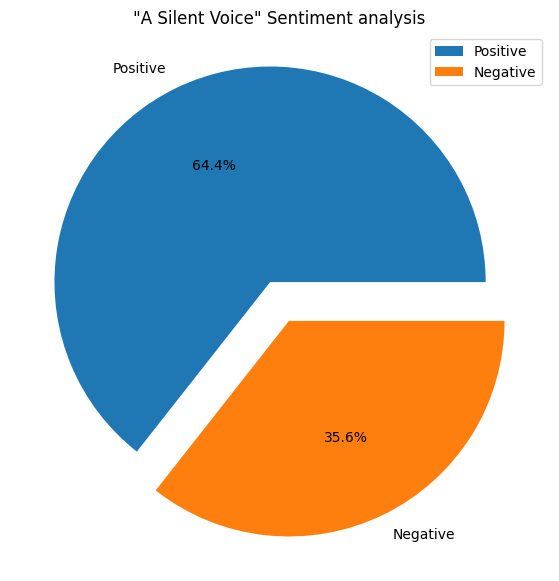

In [ ]:
import matplotlib.pyplot as plt

tb_counts2 = Mal_data2['Analysis'].value_counts()

explode = [0.1] * len(tb_counts)

plt.figure(figsize=(10, 7))
plt.title('"A Silent Voice" Sentiment analysis')
plt.pie(tb_counts.values, labels=tb_counts.index, explode=explode, autopct='%1.1f%%', shadow=False)
plt.legend(labels=['Positive', 'Negative', 'Neutral'], loc='upper right')

plt.show()

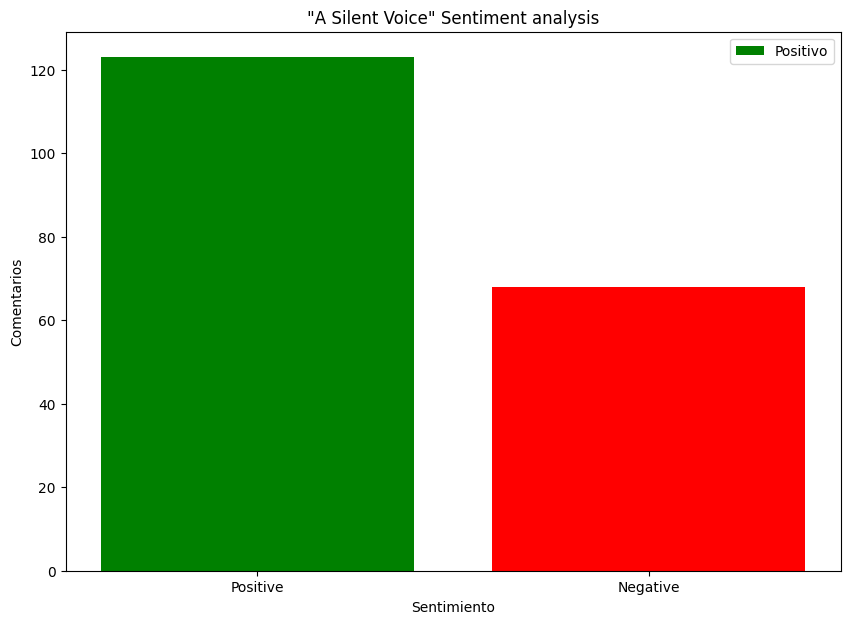

In [ ]:
tb_counts = Mal_data2['Analysis'].value_counts()

colors = ['green', 'red', 'blue']

plt.figure(figsize=(10, 7))
plt.bar(tb_counts.index, tb_counts.values, color=colors)

plt.legend(labels=['Positivo', 'Negative', 'Neutral'], loc='upper right')

plt.xlabel('Sentimiento')
plt.ylabel('Comentarios')
plt.title('"A Silent Voice" Sentiment analysis')

plt.show()

<ipython-input-79-eab89582cb6e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values('Fecha', inplace=True)


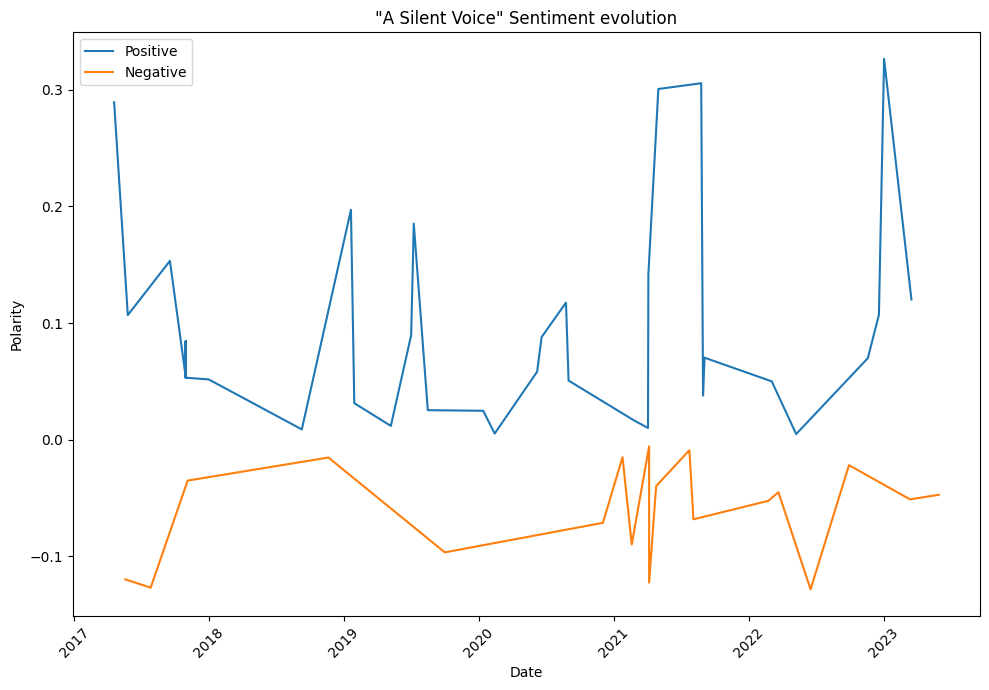

In [ ]:
Mal_data2.sort_values('Fecha', inplace=True)

fig, ax = plt.subplots(figsize=(10, 7))

sentiments = Mal_data2['Analysis'].unique()

for sentiment in sentiments:

    data = Mal_data2[Mal_data2['Analysis'] == sentiment]

    data.sort_values('Fecha', inplace=True)

    polarities = data['Polarity']
    dates = data['Fecha']
    counts = data.shape[0]

    ax.plot(dates, polarities, label=sentiment)

ax.set_xlabel('Date')
ax.set_ylabel('Polarity')
ax.set_title('"A Silent Voice" Sentiment evolution')

plt.xticks(rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

# **4. Web Scraping:** Violet Evergarden - Shinichi Nakamura

Elija un sitio web que contenga comentarios de películas.

Utilice bibliotecas como BeautifulSoup o Selenium para extraer los comentarios de las películas. Guarde los datos en un archivo CSV o DataFrame.

In [ ]:
# Primero se indica la cantidad de paginas que deben ser escaneas "EJ: IMDB Spiderman Pagina 1,2,3,4,5,6,7,8,9,10"
no_pages = 10

#
def get_data(pageNo):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0",
        "Accept-Encoding": "gzip, deflate",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
        "DNT": "1",
        "Connection": "close",
        "Upgrade-Insecure-Requests": "1"
    }

    url = 'https://myanimelist.net/anime/37987/Violet_Evergarden_Movie/reviews?sort=suggested&filter_check=&filter_hide=&preliminary=on&spoiler=off&p=' + str(pageNo)
    r = requests.get(url, headers=headers)
    content = r.content
    soup = BeautifulSoup(content, 'html.parser')

    comentario_html = soup.find_all('div', class_="text")
    comentarios = [comentario.get_text(strip=True) for comentario in comentario_html]

    fecha_html = soup.find_all('div', class_="update_at")
    fechas = [datetime.strptime(fecha.get_text(strip=True), '%b %d, %Y') for fecha in fecha_html]

    usuario_html = soup.find_all('div', class_="username")
    usuarios = [usuario.get_text(strip=True) for usuario in usuario_html]

    yourname = {'Usuario': usuarios, 'Fecha': fechas, 'Comentario': comentarios}

    df = pd.DataFrame(yourname)

    return df

data_frames = []
for pageNo in range(1, no_pages + 1):
    df = get_data(pageNo)
    data_frames.append(df)

end_data4 = pd.concat(data_frames, ignore_index=True)

print(end_data4)

            Usuario      Fecha  \
0        TCTriangle 2020-09-20   
1          -Pharos- 2020-12-11   
2    LacrimaMosa666 2020-09-18   
3        Slippery09 2021-04-23   
4     JiegerBlack34 2021-02-23   
..              ...        ...   
186   the_shermaine 2020-11-29   
187      mrkagesama 2021-11-08   
188        Snoopy25 2021-03-31   
189         Psi-nan 2021-05-24   
190         lilmory 2020-12-04   

                                            Comentario  
0    I have to personally give this film a 7/10. It...  
1    THIS REVIEW IS SPOILER-FREEAs the death-causin...  
2    Holy shit. Coming to Japan in order to watch t...  
3    The Violet Evergarden Movie is a huge disappoi...  
4    The movie finale of "Violet Evergarden" came a...  
..                                                 ...  
186  This will be spoiler free:DIm actually really ...  
187  As expected Violet Evergarden continues to be ...  
188  I will write a simple review here, unlike the ...  
189  I think this is 

## **Análisis de Sentimiento:**

Utilice una biblioteca de análisis de sentimiento, como NLTK o TextBlob, para asignar un puntaje de sentimiento a cada comentario.

Clasifique los comentarios en positivos, negativos o neutros según el puntaje de sentimiento.

In [ ]:
def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', text)
    text = re.sub('@',' ',text)
    return text

end_data4['Comments'] = end_data4['Comentario'].apply(lambda x: clean(str(x)) if isinstance(x, str) else '')

end_data4

,Usuario,Fecha,Comentario,Comments
0,TCTriangle,2020-09-20,I have to personally give this film a 7/10. It...,I have to personally give this film a It s sti...
1,-Pharos-,2020-12-11,THIS REVIEW IS SPOILER-FREEAs the death-causin...,THIS REVIEW IS SPOILER FREEAs the death causin...
2,LacrimaMosa666,2020-09-18,Holy shit. Coming to Japan in order to watch t...,Holy shit Coming to Japan in order to watch th...
3,Slippery09,2021-04-23,The Violet Evergarden Movie is a huge disappoi...,The Violet Evergarden Movie is a huge disappoi...
4,JiegerBlack34,2021-02-23,"The movie finale of ""Violet Evergarden"" came a...",The movie finale of Violet Evergarden came alo...
...,...,...,...,...
186,the_shermaine,2020-11-29,This will be spoiler free:DIm actually really ...,This will be spoiler free DIm actually really ...
187,mrkagesama,2021-11-08,As expected Violet Evergarden continues to be ...,As expected Violet Evergarden continues to be ...
188,Snoopy25,2021-03-31,"I will write a simple review here, unlike the ...",I will write a simple review here unlike the n...
189,Psi-nan,2021-05-24,I think this is my first ever review that I ha...,I think this is my first ever review that I ha...


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
import nltk
nltk.download('averaged_perceptron_tagger')

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

end_data4 = end_data4.head(500)

end_data4['POS tagged'] = end_data4['Comments'].apply(token_stop_pos)
end_data4.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
<ipython-input-8-43455e24b1f3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  end_data4['POS tagged'] = end_data4['Comments'].apply(token_stop_pos)


,Usuario,Fecha,Comentario,Comments,POS tagged
0,TCTriangle,2020-09-20,I have to personally give this film a 7/10. It...,I have to personally give this film a It s sti...,"[(personally, r), (give, v), (film, n), (still..."
1,-Pharos-,2020-12-11,THIS REVIEW IS SPOILER-FREEAs the death-causin...,THIS REVIEW IS SPOILER FREEAs the death causin...,"[(REVIEW, n), (SPOILER, n), (FREEAs, n), (deat..."
2,LacrimaMosa666,2020-09-18,Holy shit. Coming to Japan in order to watch t...,Holy shit Coming to Japan in order to watch th...,"[(Holy, n), (shit, v), (Coming, v), (Japan, n)..."
3,Slippery09,2021-04-23,The Violet Evergarden Movie is a huge disappoi...,The Violet Evergarden Movie is a huge disappoi...,"[(Violet, n), (Evergarden, n), (Movie, n), (hu..."
4,JiegerBlack34,2021-02-23,"The movie finale of ""Violet Evergarden"" came a...",The movie finale of Violet Evergarden came alo...,"[(movie, n), (finale, n), (Violet, n), (Everga..."


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

end_data4['Lemma'] = end_data4['POS tagged'].apply(lemmatize)
end_data4.head()

<ipython-input-9-bd24e3902ef2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  end_data4['Lemma'] = end_data4['POS tagged'].apply(lemmatize)


,Usuario,Fecha,Comentario,Comments,POS tagged,Lemma
0,TCTriangle,2020-09-20,I have to personally give this film a 7/10. It...,I have to personally give this film a It s sti...,"[(personally, r), (give, v), (film, n), (still...",personally give film still far good average ...
1,-Pharos-,2020-12-11,THIS REVIEW IS SPOILER-FREEAs the death-causin...,THIS REVIEW IS SPOILER FREEAs the death causin...,"[(REVIEW, n), (SPOILER, n), (FREEAs, n), (deat...",REVIEW SPOILER FREEAs death cause wave COVID...
2,LacrimaMosa666,2020-09-18,Holy shit. Coming to Japan in order to watch t...,Holy shit Coming to Japan in order to watch th...,"[(Holy, n), (shit, v), (Coming, v), (Japan, n)...",Holy shit Coming Japan order watch movie one...
3,Slippery09,2021-04-23,The Violet Evergarden Movie is a huge disappoi...,The Violet Evergarden Movie is a huge disappoi...,"[(Violet, n), (Evergarden, n), (Movie, n), (hu...",Violet Evergarden Movie huge disappointment ...
4,JiegerBlack34,2021-02-23,"The movie finale of ""Violet Evergarden"" came a...",The movie finale of Violet Evergarden came alo...,"[(movie, n), (finale, n), (Violet, n), (Everga...",movie finale Violet Evergarden come along de...


In [ ]:
end_data4[['Comentario', 'Comments','Lemma']]

,Comentario,Comments,Lemma
0,I have to personally give this film a 7/10. It...,I have to personally give this film a It s sti...,personally give film still far good average ...
1,THIS REVIEW IS SPOILER-FREEAs the death-causin...,THIS REVIEW IS SPOILER FREEAs the death causin...,REVIEW SPOILER FREEAs death cause wave COVID...
2,Holy shit. Coming to Japan in order to watch t...,Holy shit Coming to Japan in order to watch th...,Holy shit Coming Japan order watch movie one...
3,The Violet Evergarden Movie is a huge disappoi...,The Violet Evergarden Movie is a huge disappoi...,Violet Evergarden Movie huge disappointment ...
4,"The movie finale of ""Violet Evergarden"" came a...",The movie finale of Violet Evergarden came alo...,movie finale Violet Evergarden come along de...
...,...,...,...
186,This will be spoiler free:DIm actually really ...,This will be spoiler free DIm actually really ...,spoiler free DIm actually really fortunate c...
187,As expected Violet Evergarden continues to be ...,As expected Violet Evergarden continues to be ...,expect Violet Evergarden continue beautifull...
188,"I will write a simple review here, unlike the ...",I will write a simple review here unlike the n...,write simple review unlike novel others writ...
189,I think this is my first ever review that I ha...,I think this is my first ever review that I ha...,think first ever review write ignore urge co...


In [ ]:
from textblob import TextBlob

def Subjectivity(review):
    return TextBlob(review).sentiment.subjectivity

def Polarity(review):
    return TextBlob(review).sentiment.polarity

def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
Mal_data4 = pd.DataFrame(end_data4[['Comments', 'Lemma','Fecha']])

In [ ]:
Mal_data4['Polarity'] = Mal_data4['Lemma'].apply(Polarity)
Mal_data4['Analysis'] = Mal_data4['Polarity'].apply(analysis)
Mal_data4.head()

,Comments,Lemma,Fecha,Polarity,Analysis
0,I have to personally give this film a It s sti...,personally give film still far good average ...,2020-09-20,0.166973,Positive
1,THIS REVIEW IS SPOILER FREEAs the death causin...,REVIEW SPOILER FREEAs death cause wave COVID...,2020-12-11,0.238504,Positive
2,Holy shit Coming to Japan in order to watch th...,Holy shit Coming Japan order watch movie one...,2020-09-18,0.252064,Positive
3,The Violet Evergarden Movie is a huge disappoi...,Violet Evergarden Movie huge disappointment ...,2021-04-23,-0.004167,Negative
4,The movie finale of Violet Evergarden came alo...,movie finale Violet Evergarden come along de...,2021-02-23,0.059160,Positive


In [ ]:
tb_counts =Mal_data4.Analysis.value_counts()
tb_counts

Positive    186
Negative      5
Name: Analysis, dtype: int64

## **Visualización de Datos:**

Cree gráficos para visualizar los resultados del análisis de sentimiento. Puede utilizar bibliotecas como Matplotlib o Seaborn.
Genere un gráfico de barras o pastel para mostrar la distribución de los comentarios por categoría de sentimiento (positivo, negativo, neutro).
Cree un gráfico de líneas para mostrar la evolución del sentimiento a lo largo del tiempo si los comentarios tienen información temporal.

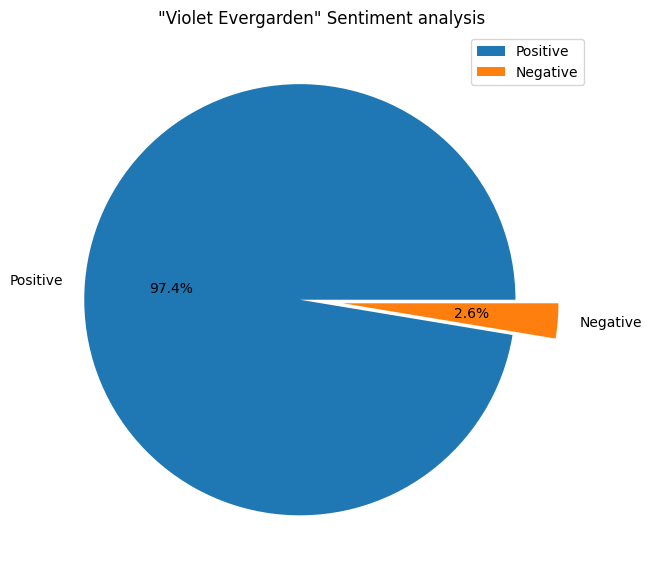

In [ ]:
import matplotlib.pyplot as plt

tb_counts = Mal_data4['Analysis'].value_counts()

explode = [0.1] * len(tb_counts)

plt.figure(figsize=(10, 7))
plt.title('"Violet Evergarden" Sentiment analysis')
plt.pie(tb_counts.values, labels=tb_counts.index, explode=explode, autopct='%1.1f%%', shadow=False)
plt.legend(labels=['Positive', 'Negative', 'Neutral'], loc='upper right')

plt.show()

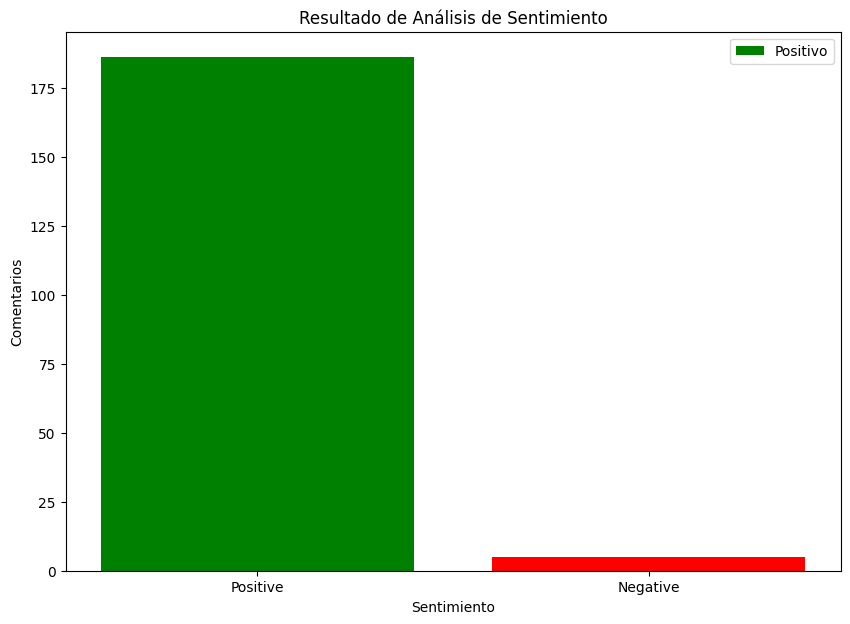

In [ ]:
tb_counts = Mal_data4['Analysis'].value_counts()

colors = ['green', 'red', 'blue']

plt.figure(figsize=(10, 7))
plt.bar(tb_counts.index, tb_counts.values, color=colors)

plt.legend(labels=['Positivo', 'Negative', 'Neutral'], loc='upper right')

plt.xlabel('Sentimiento')
plt.ylabel('Comentarios')
plt.title('"Violet Evergarden" Sentiment Analysis')

plt.show()

<ipython-input-14-69a932c91dc9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values('Fecha', inplace=True)


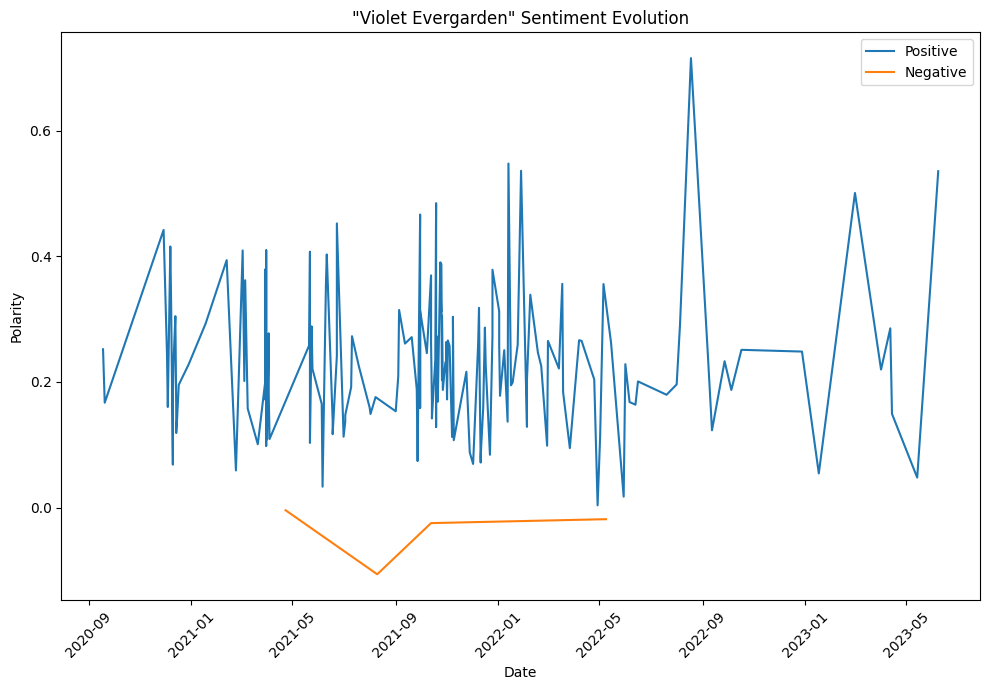

In [ ]:
Mal_data4.sort_values('Fecha', inplace=True)

fig, ax = plt.subplots(figsize=(10, 7))

sentiments = Mal_data4['Analysis'].unique()

for sentiment in sentiments:

    data = Mal_data4[Mal_data4['Analysis'] == sentiment]

    data.sort_values('Fecha', inplace=True)

    polarities = data['Polarity']
    dates = data['Fecha']
    counts = data.shape[0]

    ax.plot(dates, polarities, label=sentiment)

ax.set_xlabel('Date')
ax.set_ylabel('Polarity')
ax.set_title('"Violet Evergarden" Sentiment Evolution')

plt.xticks(rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

# **Realice conclusiones y análisis sobre los resultados obtenidos.**

**¿Cuál es la tendencia general de sentimiento en los comentarios de las películas?**

-Mayoritariamente todas son positivas, ninguna tiene un incremento negativo ni positivo a lo largo de los años desde el lanzamiento de las películas. Es importante mencionar que en la página myanimelist.net, todas tienen un rating alto, con el uso de este análisis podemos inferir que los ratings que tienen en base a los comentarios van con los puntajes en base a los comentarios que tienen las películas.

**¿Existen diferencias en el sentimiento entre géneros de películas o directores específicos?**

-De las cuatro películas, hay dos directores diferentes. Makoto Shinkai que es conocido por sus películas que tienen el género de drama y como subgénero lo supernatural, y Shinichi Nakamura que es conocido por sus películas que también cuentan con el género de drama, pero como subgénero tienen más el realismo y fantasía.

-Makoto Shinkai dirigio las peliculas, Kimi no na wa tambien conocida como “Your Name” y Tenki no ko tambien conocida como “Weathering with you”, el otro director, Shinichi Nakamura dirigio películas como Koe no katachi también conocida como “A silent voice” y “Violet Evergarden”.

-Ambas películas tuvieron buenos resultados, monetarios al igual que comentarios positivos al igual que negativos. Ambos directores tuvieron un 60%+ comentarios denotados como positivos, de tal manera que nos presenta lo siguiente, las películas que tienen los géneros de drama, son las que son mejores recibidas por el público. Por siguiente se debe notar un porcentaje bastante notorio, es la película de Violet Evergarden, hecha por Shinichi Nakamura, esta tiene una recepción de 97.4% comentarios positivos. En fin, debido a esto podemos denotar que la película que tiene mejor rating entre estas cuatro puede ser debido a la combinación de fantasía con drama.
